In [2]:
import pandas as pd
import numpy as np
from pathlib import Path



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Path to the train and test file
path = Path('/content/drive/MyDrive/Colab Notebooks/Fast-ai/Lesson 5')

In [5]:
df = pd.read_csv(path/'train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Data Analysis
df.isna().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
modes = df.mode().iloc[0]
modes

df.fillna(modes, inplace=True)

<Axes: >

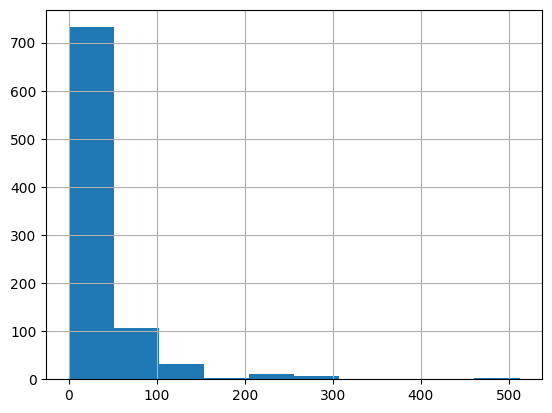

In [9]:
df['Fare'].hist()

<Axes: >

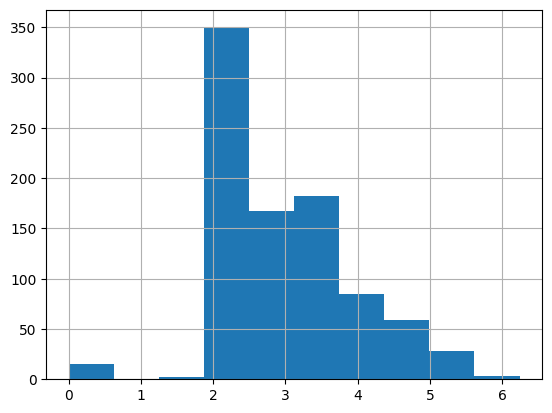

In [10]:
df['logFare'] = np.log(df['Fare']+1)

df['logFare'].hist()

In [11]:
#Converting categorical values to numerical value
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'], dtype=int)

df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,logFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1


In [19]:
import torch
from torch import tensor

#Creating dep and indep tensor columns to be processed by pytorch

t_dep = tensor(df.Survived)

t_indep = tensor(df.drop('Survived', axis=1).select_dtypes(include=['number']).values, dtype=torch.float32)

In [20]:
t_indep.shape

torch.Size([891, 14])

In [21]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff) - 0.5

In [24]:
t_indep*coeffs

torch.Size([891, 14])

In [27]:
#Now normalizing the bigger features

val, indices = t_indep.max(dim=0)

t_indep = t_indep / val

t_indep

tensor([[0.0011, 0.2750, 0.1250,  ..., 0.0000, 0.0000, 1.0000],
        [0.0022, 0.4750, 0.1250,  ..., 1.0000, 0.0000, 0.0000],
        [0.0034, 0.3250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.9978, 0.3000, 0.1250,  ..., 0.0000, 0.0000, 1.0000],
        [0.9989, 0.3250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [1.0000, 0.4000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])

In [26]:
t_indep * coeffs

tensor([[-0.0005,  0.0381,  0.0301,  ...,  0.0000,  0.0000,  0.2324],
        [-0.0010,  0.0658,  0.0301,  ...,  0.3625,  0.0000,  0.0000],
        [-0.0016,  0.0450,  0.0000,  ...,  0.0000,  0.0000,  0.2324],
        ...,
        [-0.4619,  0.0416,  0.0301,  ...,  0.0000,  0.0000,  0.2324],
        [-0.4624,  0.0450,  0.0000,  ...,  0.3625,  0.0000,  0.0000],
        [-0.4629,  0.0554,  0.0000,  ...,  0.0000,  0.1722,  0.0000]])

In [30]:
preds = (t_indep * coeffs).sum(axis=1)

In [32]:
preds.shape

torch.Size([891])

In [33]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5035)

In [34]:
#Now we define function to calculate prediciton and compute loss

def calc_pred(t_indep, coeffs):
  return (t_indep*coeffs).sum(axis=1)

def calc_loss(coeffs, indeps, deps): return torch.abs(calc_pred(coeffs, indeps)-deps).mean()

In [ ]:
from fastai.data.transforms import RandomSplitter

train_split, val_split = RandomSplitter(seed=42)(df)

train_indep, val_indep = t_indep[train_split], t_indep[val_split]
train_dep, val_dep = t_dep[train_split], t_dep[val_split]

In [ ]:
#Create one function to update coeffs and another function which contains all step on one epoch so it can be called again and again

def update_coeffs(coeffs, lr):
  coeffs = coeffs.sub_(coeffs.grad * lr)
  coeffs.grad.zero_()

def one_epoch(coeffs, lr):
  loss = calc_loss(coeffs, train_indep, train_dep)
  loss.backward()

  with torch.no_grad(): update_coeffs(coeffs, lr=0.1)

  print(f"{loss:.3f}", end="; ")


def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()